**Chapter 6 – Decision Trees**

_This notebook contains all the sample code and solutions to the exercises in chapter 6._

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/06_decision_trees.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Training and visualizing

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

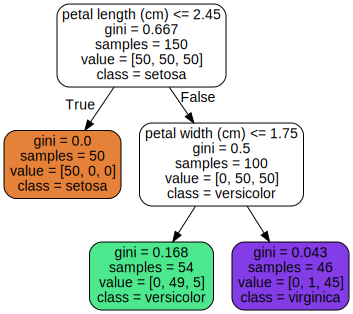

In [3]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

Saving figure decision_tree_decision_boundaries_plot


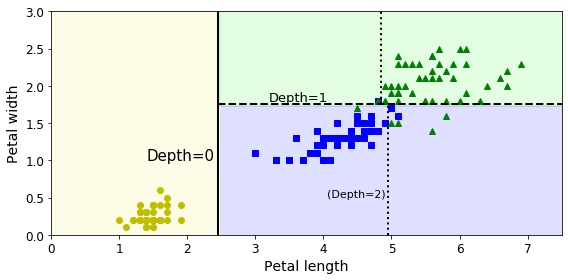

In [4]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

# Predicting classes and class probabilities

In [5]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [6]:
tree_clf.predict([[5, 1.5]])

array([1])

# Sensitivity to training set details

In [7]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris versicolor flower

array([[4.8, 1.8]])

In [8]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=40, splitter='best')

Saving figure decision_tree_instability_plot


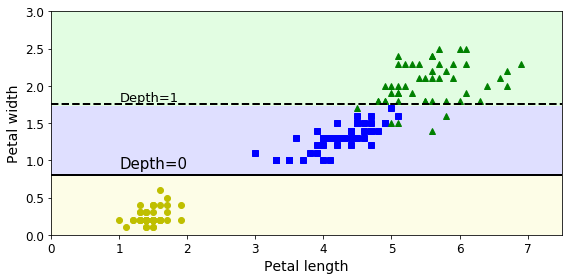

In [9]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

save_fig("decision_tree_instability_plot")
plt.show()

Saving figure min_samples_leaf_plot


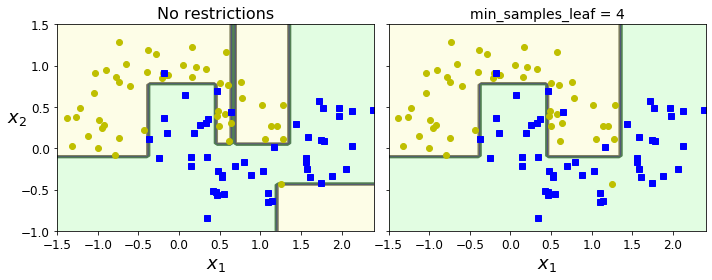

In [10]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

save_fig("min_samples_leaf_plot")
plt.show()

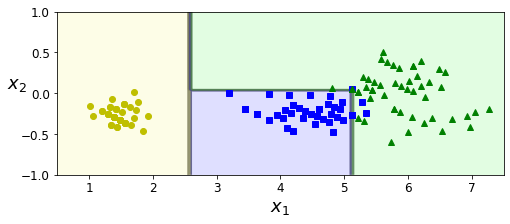

In [11]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)

plt.show()

Saving figure sensitivity_to_rotation_plot


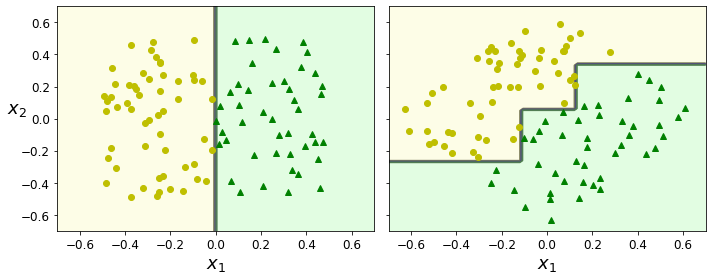

In [12]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.ylabel("")

save_fig("sensitivity_to_rotation_plot")
plt.show()

# Regression trees

In [14]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [15]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

Saving figure tree_regression_plot


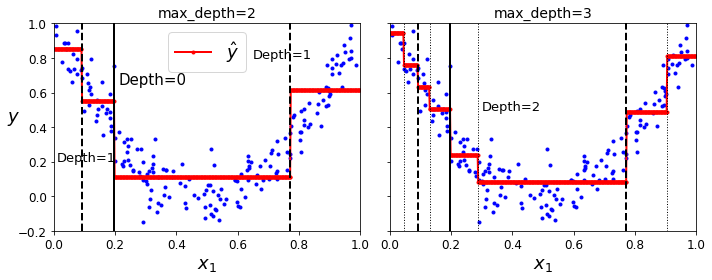

In [16]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

save_fig("tree_regression_plot")
plt.show()

In [17]:
export_graphviz(
        tree_reg1,
        out_file=os.path.join(IMAGES_PATH, "regression_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

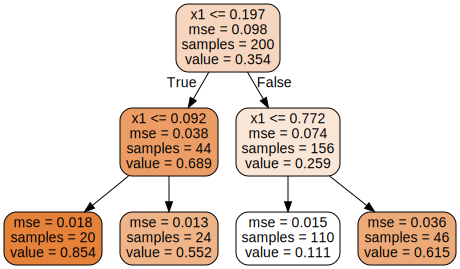

In [18]:
Source.from_file(os.path.join(IMAGES_PATH, "regression_tree.dot"))

Saving figure tree_regression_regularization_plot


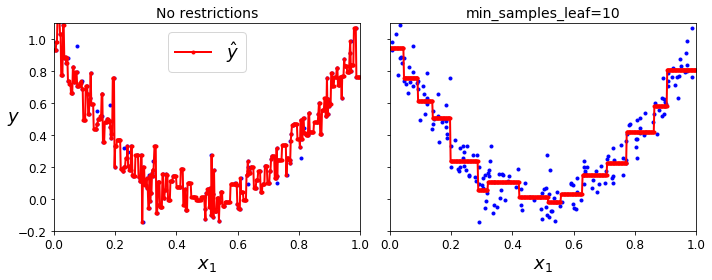

In [19]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

save_fig("tree_regression_regularization_plot")
plt.show()

# My exercise solutions

## 1. to 6.

These were theoretical questions. I answered them first, then checked the correct answers.

## 7.

The idea is to train a decision tree.

In [3]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4)

In [4]:
X

array([[ 0.9402914 ,  0.12230559],
       [ 0.12454026, -0.42477546],
       [ 0.26198823,  0.50841438],
       ...,
       [-0.24177973,  0.20957199],
       [ 0.90679645,  0.54958215],
       [ 2.08837082, -0.05050728]])

In [5]:
y

array([1, 0, 0, ..., 1, 0, 1])

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

parameters = {'max_leaf_nodes': (2, 3, 4, 5)}

decision_tree = DecisionTreeClassifier()
clf = GridSearchCV(decision_tree, parameters)
clf.fit(X_train, y_train)

/home/mislav/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_leaf_nodes': (2, 3, 4, 5)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Fals

In [8]:
clf.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [9]:
decision_tree = DecisionTreeClassifier(max_leaf_nodes=4)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [10]:
from sklearn.metrics import accuracy_score

predictions = decision_tree.predict(X_test)
accuracy_score(predictions, y_test)

0.85

## 8.

The idea is to train a random forest. (Note: This is a continuation of the previous exercise)

In [11]:
len(X_train)

8000

Now I need to split the X_train dataset so that it contains 100 instances.

In [12]:
from sklearn.model_selection import ShuffleSplit

rs = ShuffleSplit(n_splits=1000, train_size=0.0125)

In [13]:
rs.get_n_splits(X_train)

1000

In [14]:
for train_index, test_index in rs.split(X_train):
    print("TRAIN:", train_index, "TEST:", test_index)
    print("len(train_index)")
    print(len(train_index))
    print("len(test_index)")
    print(len(test_index))

TRAIN: [7215 5514 1342 7777 2889 1759 3693 2611 6621 5810 6262 2555 5824 5949
 5596  762 6437 1734 5858  957 6039 1722  506 4964 7744 1281 4507 6718
  390 4574 4785 4424 3224 3704 3426 4613 3570 1698 5512 6207 1549 7966
  645 1553 4820 7280 2578 6698 1480 5076 5681 3518 2655 3801 4754 1752
 5459 1894 6415 3811 4219 4075 6294 3356 2198 7038 1826 7757 6435 3338
 3230 5054 5456 3477 7982 7033 5243  556 3355 1546 4283 1941 4342 7081
 4387 4755 7958 5036 2779 1857 7289  473 7845 4734 3807  440 6265 1209
 7032 6312] TEST: [ 825 6245 4694 ... 3509 1636 4080]
len(train_index)
100
len(test_index)
7900
TRAIN: [2087  170 5116  473 7205 7312 2029 4167 4031 4816 2654 1985 4176 4775
 6487 6418 5197 6780 7201 4210 3204  640 7980 7643 3154   28 7160  569
 3048 3021 6576 1418 1089 6992 2397 1046 4011 7122 5458 1697 7096 7821
 4396 2340  435 5294 6912 5903 3705 2084 4645 1464  495  664 6484 2062
 3334 1699 3544 2864 7393 4336 2297 6219 3694 1858 5511 6566 5470 5227
 7152 2741 7035 5493 3648 7654 6720  2

TRAIN: [7416  509 3153  779 2448 2749 2990 6217 3246 6700 7158 3577 1555 3058
  623 6744 6898 6472 3123 4449 5624  566 3866  750  559  319  581   14
 1490 3415  421 6354 1480 1524 1734 4632   74 6676 3962 5907 4796 7464
 3230 6397 2484  184 1591 1661 2415 5672 1630 5484 3180 2819 5725 3147
 6185 7692 5171 3330 1749 1499 5179 2134 1092 1481 6431 3236  361 4524
 2545 5312 5658 4370 7412  597 5883 6319 1406 2196 3764 4074 2469 1674
 5599 6686 7352 3797 3596 1449 7193  191 1290 7344 1255  725 6266 3629
 7143  607] TEST: [2654 2977 2585 ... 2337 4952 7924]
len(train_index)
100
len(test_index)
7900
TRAIN: [  36 4162 5933 4230 7786 4625  679 1823 7292 4585  509  573 1165 3662
 3696  819   40 3771 4384 1227 4006 7953 7156 5415 4688 1736 6917 1181
 7238 2733 4390 5125 7056 5162 3539 1470 6760 7544 6111 3032 7003 3386
 2655 4171 7634 3714 2902 2702 1934 2808 7272 5760 2965 5761  133 1366
 5533 6726 4112  586 4972  987 1706 3942 7204 7330 5233 4403 5786 3858
 2722 1040 5488 7770  816 1564 3811 51

 7971 6856] TEST: [4552 3344 1304 ... 1078 5315 1144]
len(train_index)
100
len(test_index)
7900
TRAIN: [3947 4482 3165 4466 6918 1487 5324 7216 5904 5446 5535 2820 1040 6750
 1472 7331 6848 6993 6408 1766 7811 7009 6196 4856 5234 4669 4066 4759
 1980 1696 5896 4561 3679 5196 3261 1492 5054 5223   37 2228 3059  700
 4579 4693 2651 7329 5914 5108 2813 2472 6598 5474 7924 6255 4092 4496
 5178 5968 3598 3118 2843 5235 3842 5821 1032 4136 6449 7548 1899 3704
 2016 2266 3946 4250 7101  822 3097 3088 2162 5457 4157   10 7054 6997
 1257 3487 4252 7355 2516 5724 1024 7630 6224 3360 3530 1426 7694 6896
 7715 2412] TEST: [6903 3244  858 ... 5379 1568 6882]
len(train_index)
100
len(test_index)
7900
TRAIN: [ 823 1275  256  741 6099 4784 4962 6892 4163  701 7490 1797 7120 4117
 7041 1364 6920 6311 3008 7255 5353 3262 2710 1853 7296  570 3430 3535
 3162 1145 1543 5858 6368 4519 1570  377 4555 5867 3203  985 6131 5726
 4409 4368 1751 3426 4674 7809  441 1136  977 6316 7086 2136 6798 6885
 6461  674 37

TRAIN: [ 156 1549 5167 3754 6726  545 6010 1056 7009 3591 4205 1702 2131 2354
 6574 2753 3770 7617 7783 3405 1805 7042 4200 6224  653 1937 4517 4327
 5679 2731 6018 3143 3762 5410 5642 5330  659 7910 1089 2979 3217 6432
 4564 4742 3223 1674  730 7465 3064 6949 1587 6984 5270 7251 2397 6199
 7367 1379 7572 1092 3628  389 7649 6966 4331 3821 6378 6219  967 1762
  794 1929 7224 5151 6073 2311 1333  266 7891 2589 1850 5391 6220 4569
 4267 7574  833 7866 2490 4403  991 4884 6166 5759 1281 3676   91 2219
 1315 1949] TEST: [6353 5911 4747 ... 6129 1335 5908]
len(train_index)
100
len(test_index)
7900
TRAIN: [5947 4633  900 7344 7741 5176 3216 2367 6784  663 3879 1639   55 1312
 3557 4087  667 1438 7523  393 1489 5078 3659 3029 6452 2090  804 6033
 4727 3219  877  355 1788 4114 2771 6050  802 7736 6466 7240  250 1066
 7220 7894 6571  775  133 3110 6278  954 2212 7130  369   47 4855 2338
 5694 3528  312 3679 7379 5523 1297 7477 4282 6695 2215 2831 4394 7695
 6490 3617 4572 4656 7295 7006 5765 70

TRAIN: [4363 4231 3973 4845 5977 2581 5321 6377 7307 4535  455 1661 5254 7136
 7074 2072 6980 4039 5424 4028   59 2568 7187 1696 2112 6417 7261 2220
 4312 5889 5558 4015 5935 4503 4585 7030 1680 3561 4001 1348 1795 2574
 4908  302   40 6839 4399 4899 5613 3725  304 5506  441 6121 5122 7503
 3657 2402 3381 6562 3110 6349 4477  801 3544 5335 5855 1741 7902 5885
 3987 5120 2764 5290 5393  412 6347 7710 3445 3994 1585 6166 4758 3413
 1092 4537 7214 4305 1368 3107 6877 6046 4945 1128 1179 5957 4963 4424
 3683  853] TEST: [3707 6767 1755 ... 4445  508 6723]
len(train_index)
100
len(test_index)
7900
TRAIN: [3288 5514 6472 5537 2137 2499 6152 5654 7315 7018  498  793 7581 5194
 5394 2754 2006 5300  891  440 5819 5948 3241 5201 7824 6424 4981 4041
  168 4092 4933  383 4033 5234 2273 5114   46 7889 7027  574 2180 3053
  114 6788 3265 7880 7077 3069 4996 1066 5701 4682 5768 6378 5788 1743
 2726 2359 4828 4685 6679 7172 1118 2999 5378 4513 6571 2341 5309 2953
 3876 1099 6761 6466 1785 2255 3414 17

In [15]:
decision_trees_list = []

for i in range (0, 1000):
    decision_tree = DecisionTreeClassifier(max_leaf_nodes=4)
    decision_tree.fit(X_train[train_index], y_train[train_index])
    decision_trees_list.append(decision_tree)
    predictions = decision_tree.predict(X_train[test_index])
    print(accuracy_score(predictions, y_train[test_index]))

0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455

0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455

0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455696202
0.8525316455

In [16]:
from scipy import stats
import numpy as np

predictions = []

for j in range(0, len(decision_trees_list)):
    predictions.append(decision_trees_list[j].predict(X_test))
    
print(np.array(X_test).shape)
print(np.array(predictions).shape)
final_predictions = stats.mode(predictions, axis=0)
print(final_predictions)
print(np.array(final_predictions).shape)

(2000, 2)
(1000, 2000)
ModeResult(mode=array([[1, 0, 1, ..., 0, 1, 0]]), count=array([[1000, 1000, 1000, ..., 1000, 1000, 1000]]))
(2, 1, 2000)


In [17]:
print(final_predictions[0])
print(len(final_predictions[0]))

[[1 0 1 ... 0 1 0]]
1


In [18]:
print(final_predictions[1])
print(len(final_predictions[1]))

[[1000 1000 1000 ... 1000 1000 1000]]
1


In [19]:
print(final_predictions[2])
print(len(final_predictions[2]))

IndexError: tuple index out of range

In [20]:
print(final_predictions)

ModeResult(mode=array([[1, 0, 1, ..., 0, 1, 0]]), count=array([[1000, 1000, 1000, ..., 1000, 1000, 1000]]))


In [21]:
print(final_predictions[0])

[[1 0 1 ... 0 1 0]]


In [22]:
accuracy_score(final_predictions[0], y_test)

ValueError: Found input variables with inconsistent numbers of samples: [1, 2000]

### Note: I can't figure out what's wrong with the above code... The length of the array which found the mode is 1, although it should be 2000... Something is off.

# Exercise solutions

## 1. to 6.

See appendix A.

## 7.

_Exercise: train and fine-tune a Decision Tree for the moons dataset._

a. Generate a moons dataset using `make_moons(n_samples=10000, noise=0.4)`.

Adding `random_state=42` to make this notebook's output constant:

In [19]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

b. Split it into a training set and a test set using `train_test_split()`.

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

c. Use grid search with cross-validation (with the help of the `GridSearchCV` class) to find good hyperparameter values for a `DecisionTreeClassifier`. Hint: try various values for `max_leaf_nodes`.

In [21]:
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    6.8s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'min_samples_split': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
      

In [22]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=17,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

d. Train it on the full training set using these hyperparameters, and measure your model's performance on the test set. You should get roughly 85% to 87% accuracy.

By default, `GridSearchCV` trains the best model found on the whole training set (you can change this by setting `refit=False`), so we don't need to do it again. We can simply evaluate the model's accuracy:

In [23]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8695

## 8.

_Exercise: Grow a forest._

a. Continuing the previous exercise, generate 1,000 subsets of the training set, each containing 100 instances selected randomly. Hint: you can use Scikit-Learn's `ShuffleSplit` class for this.

In [24]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42)
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

b. Train one Decision Tree on each subset, using the best hyperparameter values found above. Evaluate these 1,000 Decision Trees on the test set. Since they were trained on smaller sets, these Decision Trees will likely perform worse than the first Decision Tree, achieving only about 80% accuracy.

In [25]:
from sklearn.base import clone

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

0.8054499999999999

c. Now comes the magic. For each test set instance, generate the predictions of the 1,000 Decision Trees, and keep only the most frequent prediction (you can use SciPy's `mode()` function for this). This gives you _majority-vote predictions_ over the test set.

In [26]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [27]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

d. Evaluate these predictions on the test set: you should obtain a slightly higher accuracy than your first model (about 0.5 to 1.5% higher). Congratulations, you have trained a Random Forest classifier!

In [28]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.872